# Tcell analysis in 3D

## 1. Assigning 3D info to 2D features

This code allows the detection of cell labels in 3D, by adding the information of which 3D cell label each section in the 2D analysis belongs to to the data set including the 2D features. 

In [ ]:
from Cells import Cells
from MGFeatures import *
import numpy as np
import pandas as pd
from joblib import Parallel, delayed
import napari
from tifffile import imsave
import skimage.measure
import time
import seaborn as sns
import matplotlib.pyplot as plt
import cc3d

In [3]:
def get_area(labels, labels_list): 
    areas = []
    for i in labels_list:
        area = np.count_nonzero(labels == i)
        areas.append(area)
    areas = np.array(areas)
    return areas

In [4]:
folder = r'Y:\MS293_Shun_Immunogold_030523\Segmentation\cell_final'
heterochromatin_folder = r'Y:\MS293_Shun_Immunogold_030523\Segmentation\heterochromatin_final'
gold_folder = r'Y:\MS293_Shun_Immunogold_030523\Segmentation\gold_final'
lysosomes_folder = r'Y:\MS293_Shun_Immunogold_030523\Segmentation\lysosomes_final'
mitochondria_folder = r'Y:\MS293_Shun_Immunogold_030523\Segmentation\mitochondria_final'
nucleus_folder = r'Y:\MS293_Shun_Immunogold_030523\Segmentation\nucleus_final'
ER_folder = r'Y:\MS293_Shun_Immunogold_030523\Segmentation\er_final'
golgi_folder = r'Y:\MS293_Shun_Immunogold_030523\Segmentation\golgi_final'

In [4]:
cell_stack = np.zeros(shape = (5, 37440, 35168))
for i in range(0,5):
    cell = Cells(i)
    imageshape = cell.get_imageshape(folder) 
    cell_image = cell.img_from_tiles(folder)
    binary_image = cell_image.astype(bool)
    cell_stack[i] = binary_image
cell_labels = cc3d.connected_components(cell_stack, connectivity=18)

In [120]:
features2d = pd.read_excel('total_features_v5.xlsx', index_col=0)

In [121]:
features2d

,cell_area,cell_aspect,cell_roundness,number_mito,mean_mito_aspect,std_mito_aspect,mean_mito_area,std_mito_area,mean_mito_roundness,std_mito_roundness,...,gold_area,nucleus_area,golgi_area,cytoplasm_area,ER_lengths,sl_num,x1,x2,y1,y2
0,567924,0.692308,0.505520,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,13744,281080,0,286844,5790.005387,0,3256,4084,29148,30344
1,523764,0.821293,0.602579,13,0.859884,0.146664,1620.307692,978.392507,0.844462,0.142653,...,7468,291312,1237,232452,9256.108314,0,3658,4710,28706,29570
2,29448,0.535000,0.234340,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,540,0,0,29448,452.752307,0,4720,5120,29274,29488
3,110076,0.555133,0.506560,3,0.954545,0.078730,945.333333,392.333192,0.991240,0.099072,...,1368,72748,0,37328,0.000000,0,6784,7310,30750,31042
4,99388,0.684647,0.544691,3,0.944444,0.096225,574.000000,228.085510,0.984248,0.111467,...,712,13240,0,86148,1835.581945,0,9622,10104,29474,29804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,369140,0.600406,0.483445,5,0.850536,0.065374,1480.800000,277.105034,0.761238,0.125115,...,49612,154772,0,214368,1810.378847,150,9782,10768,32244,32836
0,365204,0.560158,0.452241,3,0.951297,0.004712,1310.666667,246.619815,0.972257,0.014880,...,23112,173964,0,191240,942.607209,151,9792,10806,32336,32904
0,380196,0.542650,0.398616,2,0.917273,0.052712,1592.000000,175.362482,0.919702,0.064701,...,11752,189780,0,190416,524.724962,152,9754,10856,32274,32872
0,333256,0.579957,0.482261,2,0.797203,0.093951,1330.000000,82.024387,0.755895,0.221953,...,20952,187116,0,146140,1117.300639,153,9834,10772,32334,32878


In [128]:
features5 = pd.DataFrame()
features5 = features2d[(features2d['sl_num'] >= 0) & (features2d['sl_num']  < 5)].reset_index()

In [129]:
features5

,index,cell_area,cell_aspect,cell_roundness,number_mito,mean_mito_aspect,std_mito_aspect,mean_mito_area,std_mito_area,mean_mito_roundness,...,gold_area,nucleus_area,golgi_area,cytoplasm_area,ER_lengths,sl_num,x1,x2,y1,y2
0,0,567924,0.692308,0.505520,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,13744,281080,0,286844,5790.005387,0,3256,4084,29148,30344
1,1,523764,0.821293,0.602579,13,0.859884,0.146664,1620.307692,978.392507,0.844462,...,7468,291312,1237,232452,9256.108314,0,3658,4710,28706,29570
2,2,29448,0.535000,0.234340,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,540,0,0,29448,452.752307,0,4720,5120,29274,29488
3,3,110076,0.555133,0.506560,3,0.954545,0.078730,945.333333,392.333192,0.991240,...,1368,72748,0,37328,0.000000,0,6784,7310,30750,31042
4,4,99388,0.684647,0.544691,3,0.944444,0.096225,574.000000,228.085510,0.984248,...,712,13240,0,86148,1835.581945,0,9622,10104,29474,29804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,22,520156,0.772201,0.617055,1,0.607843,0.000000,4148.000000,0.000000,0.507631,...,10928,314584,0,205572,0.000000,4,17208,18244,30548,31348
133,23,82040,0.935294,0.903604,1,0.958333,0.000000,1808.000000,0.000000,0.999139,...,2920,20060,0,61980,422.617312,4,17266,17606,34182,34500
134,24,4,1.000000,1.273240,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,4,0.000000,4,17794,17796,7276,7278
135,25,245740,0.652174,0.577604,4,0.772139,0.133778,1058.000000,377.656811,0.733869,...,2100,124600,2241,121140,2015.162679,4,17796,18532,11714,12194


In [49]:
for i in range(173):
    if (features5['index'][i]) == 0:
        print(features5['x1'][i])

3256
3250
3242
3270
3256
3258


In [51]:
filtered_values = features5.loc[features5['sl_num'] == 0, 'x1']
print(filtered_values)

0      3256
1      3658
2      4720
3      6784
4      9622
5     10064
6     10106
7     10120
8     13274
9     13856
10    14194
11    14280
12    14425
13    14582
14    16262
15    16442
16    16994
17    17168
18    17252
19    17626
20    17828
21    17832
22    17930
Name: x1, dtype: int64


In [73]:
filtered = features5.loc[features5['sl_num'] == 0]
filtered['x1'][0]

3256

In [16]:
for i in range(1, cell_labels[0].max()+1):
    layer = np.where(cell_labels[0] == i)#coordinates of the first section of each of the cells
    if len(layer[0]) > 0 and len(layer[1]) > 0:
        filtered = features5.loc[features5['sl_num'] == 0] 
        id_3d_values = []
        for n in range(len(filtered)):
            if (layer[0].min() >= filtered['x1'][n]) and (layer[0].max() <= filtered['x2'][n]) and (layer[1].min() >= filtered['y1'][n]) and (layer[1].max() <= filtered['y2'][n]):
                id_3d_values.append(i)
        filtered['id_3d'] = id_3d_values
        features5.loc[filtered.index, 'id_3d'] = filtered['id_3d']

ValueError: Length of values (0) does not match length of index (23)

In [55]:
filtered = features5.loc[features5['sl_num'] == 2] 
features5new = features5.drop(columns = ['id_3d'])
features5new

,index,cell_area,cell_aspect,cell_roundness,number_mito,mean_mito_aspect,std_mito_aspect,mean_mito_area,std_mito_area,mean_mito_roundness,...,gold_area,nucleus_area,golgi_area,cytoplasm_area,ER_lengths,sl_num,x1,x2,y1,y2
0,0,567924,0.692308,0.505520,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,13744,281080,0,286844,5790.005387,0,3256,4084,29148,30344
1,1,523764,0.821293,0.602579,13,0.859884,0.146664,1620.307692,978.392507,0.844462,...,7468,291312,1237,232452,9256.108314,0,3658,4710,28706,29570
2,2,29448,0.535000,0.234340,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,540,0,0,29448,452.752307,0,4720,5120,29274,29488
3,3,110076,0.555133,0.506560,3,0.954545,0.078730,945.333333,392.333192,0.991240,...,1368,72748,0,37328,0.000000,0,6784,7310,30750,31042
4,4,99388,0.684647,0.544691,3,0.944444,0.096225,574.000000,228.085510,0.984248,...,712,13240,0,86148,1835.581945,0,9622,10104,29474,29804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,22,520156,0.772201,0.617055,1,0.607843,0.000000,4148.000000,0.000000,0.507631,...,10928,314584,0,205572,0.000000,4,17208,18244,30548,31348
133,23,82040,0.935294,0.903604,1,0.958333,0.000000,1808.000000,0.000000,0.999139,...,2920,20060,0,61980,422.617312,4,17266,17606,34182,34500
134,24,4,1.000000,1.273240,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,4,0.000000,4,17794,17796,7276,7278
135,25,245740,0.652174,0.577604,4,0.772139,0.133778,1058.000000,377.656811,0.733869,...,2100,124600,2241,121140,2015.162679,4,17796,18532,11714,12194


In [65]:
features5 = features5.drop(columns = ['id_3d'])
features

KeyError: "['id_3d'] not found in axis"

In [69]:
features5 = features5.drop(columns = ['index'])

In [70]:
features5

,cell_area,cell_aspect,cell_roundness,number_mito,mean_mito_aspect,std_mito_aspect,mean_mito_area,std_mito_area,mean_mito_roundness,std_mito_roundness,...,gold_area,nucleus_area,golgi_area,cytoplasm_area,ER_lengths,sl_num,x1,x2,y1,y2
0,567924,0.692308,0.505520,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,13744,281080,0,286844,5790.005387,0,3256,4084,29148,30344
1,523764,0.821293,0.602579,13,0.859884,0.146664,1620.307692,978.392507,0.844462,0.142653,...,7468,291312,1237,232452,9256.108314,0,3658,4710,28706,29570
2,29448,0.535000,0.234340,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,540,0,0,29448,452.752307,0,4720,5120,29274,29488
3,110076,0.555133,0.506560,3,0.954545,0.078730,945.333333,392.333192,0.991240,0.099072,...,1368,72748,0,37328,0.000000,0,6784,7310,30750,31042
4,99388,0.684647,0.544691,3,0.944444,0.096225,574.000000,228.085510,0.984248,0.111467,...,712,13240,0,86148,1835.581945,0,9622,10104,29474,29804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,520156,0.772201,0.617055,1,0.607843,0.000000,4148.000000,0.000000,0.507631,0.000000,...,10928,314584,0,205572,0.000000,4,17208,18244,30548,31348
133,82040,0.935294,0.903604,1,0.958333,0.000000,1808.000000,0.000000,0.999139,0.000000,...,2920,20060,0,61980,422.617312,4,17266,17606,34182,34500
134,4,1.000000,1.273240,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,4,0.000000,4,17794,17796,7276,7278
135,245740,0.652174,0.577604,4,0.772139,0.133778,1058.000000,377.656811,0.733869,0.150345,...,2100,124600,2241,121140,2015.162679,4,17796,18532,11714,12194


In [137]:
features5new =  features5.copy()
for j in range(5):
    filtered = pd.DataFrame()
    filtered = features5new.loc[features5new['sl_num'] == j] 
    id_3d_values = [0] * len(filtered)
    for i in range(1, cell_labels[j].max()+1):
        layer = np.where(cell_labels[j] == i)
        if layer[0].size != 0: #coordinates of the first section of each of the cells
            for n in range(len(filtered)):
                filtered_index = filtered.loc[filtered['index']==n]
                if (layer[0].min() >= filtered_index['x1'][0]) and (layer[0].max() <= filtered_index['x2'][0]) and (layer[1].min() >= filtered_index['y1'][0]) and (layer[1].max() <= filtered_index['y2'][0]):
                    id_3d_values[n] = i
    filtered['id_3d'] = id_3d_values
    features5new.loc[filtered.index, 'id_3d'] = filtered['id_3d']

KeyError: 0

In [143]:
features5new =  features5.copy()
features5new['id_3d'] = 0
for j in range(5):
    for i in range(1, cell_labels[j].max()+1):
        layer = np.where(cell_labels[j] == i)
        if layer[0].size != 0: #coordinates of the first section of each of the cells
            for n in range(len(features5new)):
                if features5new.loc[n, 'sl_num'] == j:
                    if (layer[0].min() >= features5new['x1'][n]) and (layer[0].max() <= features5new['x2'][n]) and (layer[1].min() >= features5new['y1'][n]) and (layer[1].max() <= features5new['y2'][n]):
                        features5new['id_3d'][n] = i

C:\Users\Gast-User\AppData\Local\Temp\ipykernel_7084\1881578070.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features5new['id_3d'][n] = i


# Function features_to_3d

In [146]:
def features_to_3d(cell_labels, features):
    featuresnew =  features.copy()
    featuresnew['id_3d'] = 0
    for j in range(5):
        for i in range(1, cell_labels[j].max()+1):
            layer = np.where(cell_labels[j] == i)
            if layer[0].size != 0: #coordinates of the first section of each of the cells
                for n in range(len(featuresnew)):
                    if featuresnew.loc[n, 'sl_num'] == j:
                        if (layer[0].min() >= featuresnew['x1'][n]) and (layer[0].max() <= featuresnew['x2'][n]) and (layer[1].min() >= featuresnew['y1'][n]) and (layer[1].max() <= featuresnew['y2'][n]):
                            featuresnew['id_3d'][n] = i

In [150]:
start_time = time.time()
cell_stack = np.zeros(shape = (5, 37440, 35168))
for i in range(0,5):
    cell = Cells(i)
    imageshape = cell.get_imageshape(folder) 
    cell_image = cell.img_from_tiles(folder)
    binary_image = cell_image.astype(bool)
    cell_stack[i] = binary_image
cell_labels = cc3d.connected_components(cell_stack, connectivity=18)
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: ", elapsed_time)

Elapsed time:  62.20431709289551


In [151]:
features2d = pd.read_excel('total_features_v5.xlsx', index_col=0)

In [152]:
features5 = pd.DataFrame()
features5 = features2d[(features2d['sl_num'] >= 0) & (features2d['sl_num']  < 5)].reset_index()

In [153]:
start_time = time.time()
features5_3d = features_to_3d(cell_labels, features5)
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: ", elapsed_time)

C:\Users\Gast-User\AppData\Local\Temp\ipykernel_7084\3347081662.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featuresnew['id_3d'][n] = i


Elapsed time:  402.0276348590851


In [94]:
layers.to_excel('bbox_3d_0.xlsx')

# Analysis with 3d info

In [30]:
features3d_78 = pd.read_excel(r'C:\Users\Gast-User\Downloads\features78_v2.xlsx', index_col=0)
features3d_155 = pd.read_excel(r'C:\Users\Gast-User\Downloads\features155_v2.xlsx', index_col=0)

In [31]:
features3d = pd.DataFrame()
features3d = features3d.append(features3d_78) 
features3d = features3d.append(features3d_155) 

C:\Users\Gast-User\AppData\Local\Temp\ipykernel_20384\3881963668.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features3d = features3d.append(features3d_78)
C:\Users\Gast-User\AppData\Local\Temp\ipykernel_20384\3881963668.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features3d = features3d.append(features3d_155)


In [32]:
features3d.reset_index(drop=True, inplace=True)
features3d.drop(columns = ['index'])

,cell_area,cell_aspect,cell_roundness,number_mito,mean_mito_aspect,std_mito_aspect,mean_mito_area,std_mito_area,mean_mito_roundness,std_mito_roundness,...,nucleus_area,golgi_area,cytoplasm_area,ER_lengths,sl_num,x1,x2,y1,y2,id_3d
0,567924,0.692308,0.505520,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,281080,0,286844,5790.005387,0,3256,4084,29148,30344,0
1,523764,0.821293,0.602579,13,0.859884,0.146664,1620.307692,978.392507,0.844462,0.142653,...,291312,1237,232452,9256.108314,0,3658,4710,28706,29570,0
2,29448,0.535000,0.234340,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,29448,452.752307,0,4720,5120,29274,29488,0
3,110076,0.555133,0.506560,3,0.954545,0.078730,945.333333,392.333192,0.991240,0.099072,...,72748,0,37328,0.000000,0,6784,7310,30750,31042,2
4,99388,0.684647,0.544691,3,0.944444,0.096225,574.000000,228.085510,0.984248,0.111467,...,13240,0,86148,1835.581945,0,9622,10104,29474,29804,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,369140,0.600406,0.483445,5,0.850536,0.065374,1480.800000,277.105034,0.761238,0.125115,...,154772,0,214368,1810.378847,150,9782,10768,32244,32836,674
1816,365204,0.560158,0.452241,3,0.951297,0.004712,1310.666667,246.619815,0.972257,0.014880,...,173964,0,191240,942.607209,151,9792,10806,32336,32904,674
1817,380196,0.542650,0.398616,2,0.917273,0.052712,1592.000000,175.362482,0.919702,0.064701,...,189780,0,190416,524.724962,152,9754,10856,32274,32872,674
1818,333256,0.579957,0.482261,2,0.797203,0.093951,1330.000000,82.024387,0.755895,0.221953,...,187116,0,146140,1117.300639,153,9834,10772,32334,32878,674


In [33]:
features3d = features3d.drop(columns = ['index'])

In [29]:
features3d.to_excel('features3d_all.xlsx')


PermissionError: [Errno 13] Permission denied: 'features3d_all.xlsx'

In [18]:
features3d_grouped = features3d.groupby(by='id_3d').mean()

In [39]:
features3d

,cell_area,cell_aspect,cell_roundness,number_mito,mean_mito_aspect,std_mito_aspect,mean_mito_area,std_mito_area,mean_mito_roundness,std_mito_roundness,...,nucleus_area,golgi_area,cytoplasm_area,ER_lengths,sl_num,x1,x2,y1,y2,id_3d
0,567924,0.692308,0.505520,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,281080,0,286844,5790.005387,0,3256,4084,29148,30344,0
1,523764,0.821293,0.602579,13,0.859884,0.146664,1620.307692,978.392507,0.844462,0.142653,...,291312,1237,232452,9256.108314,0,3658,4710,28706,29570,0
2,29448,0.535000,0.234340,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,29448,452.752307,0,4720,5120,29274,29488,0
3,110076,0.555133,0.506560,3,0.954545,0.078730,945.333333,392.333192,0.991240,0.099072,...,72748,0,37328,0.000000,0,6784,7310,30750,31042,2
4,99388,0.684647,0.544691,3,0.944444,0.096225,574.000000,228.085510,0.984248,0.111467,...,13240,0,86148,1835.581945,0,9622,10104,29474,29804,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,369140,0.600406,0.483445,5,0.850536,0.065374,1480.800000,277.105034,0.761238,0.125115,...,154772,0,214368,1810.378847,150,9782,10768,32244,32836,674
1816,365204,0.560158,0.452241,3,0.951297,0.004712,1310.666667,246.619815,0.972257,0.014880,...,173964,0,191240,942.607209,151,9792,10806,32336,32904,674
1817,380196,0.542650,0.398616,2,0.917273,0.052712,1592.000000,175.362482,0.919702,0.064701,...,189780,0,190416,524.724962,152,9754,10856,32274,32872,674
1818,333256,0.579957,0.482261,2,0.797203,0.093951,1330.000000,82.024387,0.755895,0.221953,...,187116,0,146140,1117.300639,153,9834,10772,32334,32878,674


In [206]:
features3d = pd.read_excel('features3d_all.xlsx', index_col=0)

In [212]:
features3d_counts = features3d.groupby('id_3d', dropna=False).size().reset_index(name='count')

In [213]:
features3d_counts

,id_3d,count
0,0,572
1,1,5
2,2,8
3,3,32
4,4,25
...,...,...
153,675,6
154,676,2
155,677,1
156,679,1


In [20]:
features3d_grouped.to_excel('features3d_grouped_v1.xlsx')

In [59]:
features3d_grouped = features3d.copy()
features3d_number = features3d.copy()

In [209]:
features3d_reduced= features3d[['cell_area','cell_aspect', 'cell_roundness', 'number_mito', 'mean_mito_aspect', 'mean_mito_area', 'mean_mito_roundness',
                                'sum_mito_area',
                               'number_nuc', 'mean_nuc_aspect', 'mean_nuc_area', 'mean_nuc_roundness', 'lysosomal_area', 
                               'heterochromatin_area', 'gold_area', 'nucleus_area', 'golgi_area', 'cytoplasm_area', 
                               'ER_lengths', 'id_3d']]
features3d_reduced

,cell_area,cell_aspect,cell_roundness,number_mito,mean_mito_aspect,mean_mito_area,mean_mito_roundness,sum_mito_area,number_nuc,mean_nuc_aspect,mean_nuc_area,mean_nuc_roundness,lysosomal_area,heterochromatin_area,gold_area,nucleus_area,golgi_area,cytoplasm_area,ER_lengths,id_3d
0,567924,0.692308,0.505520,0,0.000000,0.000000,0.000000,0,3,0.830022,93693.333333,0.774896,0,126776,13744,281080,0,286844,5790.005387,0
1,523764,0.821293,0.602579,13,0.859884,1620.307692,0.844462,21064,3,0.847731,97104.000000,0.713138,0,143084,7468,291312,1237,232452,9256.108314,0
2,29448,0.535000,0.234340,0,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0,0,540,0,0,29448,452.752307,0
3,110076,0.555133,0.506560,3,0.954545,945.333333,0.991240,2836,1,0.650000,72748.000000,0.578910,0,43092,1368,72748,0,37328,0.000000,2
4,99388,0.684647,0.544691,3,0.944444,574.000000,0.984248,1722,1,0.743590,13240.000000,0.692706,23871,9641,712,13240,0,86148,1835.581945,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,369140,0.600406,0.483445,5,0.850536,1480.800000,0.761238,7404,4,0.892113,38693.000000,0.984433,0,139612,49612,154772,0,214368,1810.378847,674
1816,365204,0.560158,0.452241,3,0.951297,1310.666667,0.972257,3932,4,0.690058,43491.000000,0.737275,0,79848,23112,173964,0,191240,942.607209,674
1817,380196,0.542650,0.398616,2,0.917273,1592.000000,0.919702,3184,1,0.611594,189780.000000,0.507531,0,115336,11752,189780,0,190416,524.724962,674
1818,333256,0.579957,0.482261,2,0.797203,1330.000000,0.755895,2660,1,0.605042,187116.000000,0.467331,0,90452,20952,187116,0,146140,1117.300639,674


In [210]:

features3d_grouped = features3d_reduced.groupby('id_3d').mean()

In [211]:
features3d_grouped

,cell_area,cell_aspect,cell_roundness,number_mito,mean_mito_aspect,mean_mito_area,mean_mito_roundness,sum_mito_area,number_nuc,mean_nuc_aspect,mean_nuc_area,mean_nuc_roundness,lysosomal_area,heterochromatin_area,gold_area,nucleus_area,golgi_area,cytoplasm_area,ER_lengths
id_3d,,,,,,,,,,,,,,,,,,,
0,119861.127622,0.754071,0.595816,1.555944,0.294586,629.405247,0.278191,2552.879371,1.884615,0.310758,41626.178796,0.273529,264.02972,27134.956294,2539.706294,49232.407343,240.555944,70628.720280,774.618424
1,44368.000000,0.840523,0.596374,1.200000,0.825420,1291.400000,0.809398,1557.400000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,435.200000,0.000000,0.000000,44368.000000,597.363314
2,227163.000000,0.701433,0.648792,3.500000,0.645426,1634.658333,0.633815,6379.000000,1.125000,0.720733,135827.250000,0.627616,0.00000,100038.500000,3170.500000,150634.000000,2070.500000,76529.000000,562.846345
3,107128.375000,0.830354,0.659237,4.375000,0.807276,1041.097768,0.779244,4667.031250,0.093750,0.072727,674.968750,0.069794,3768.78125,494.343750,2726.125000,674.968750,0.000000,106453.406250,2013.292861
4,120598.720000,0.840654,0.711565,3.040000,0.363126,785.002349,0.338346,4863.840000,0.280000,0.234888,17517.280000,0.228094,0.00000,7862.720000,3117.600000,17517.280000,1053.440000,103081.440000,1604.471065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,10915.333333,0.784947,0.578085,0.166667,0.134921,179.333333,0.129441,179.333333,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,493.333333,0.000000,0.000000,10915.333333,49.391714
676,83398.000000,0.379077,0.298596,2.500000,0.982407,1013.333333,0.998460,2474.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,4372.000000,0.000000,0.000000,83398.000000,872.887907
677,412531.000000,0.952326,0.710182,9.000000,0.784988,1300.666667,0.711368,11706.000000,1.000000,0.867797,222448.000000,0.813644,0.00000,126657.000000,11917.000000,222448.000000,0.000000,190083.000000,1094.666082


In [111]:
features3d_number['number_sections'] = features3d.groupby('id_3d').size()

In [62]:
features3d_grouped.fillna(0)

,cell_area,cell_aspect,cell_roundness,number_mito,mean_mito_aspect,std_mito_aspect,mean_mito_area,std_mito_area,mean_mito_roundness,std_mito_roundness,...,gold_area,nucleus_area,golgi_area,cytoplasm_area,ER_lengths,sl_num,x1,x2,y1,y2
id_3d,,,,,,,,,,,,,,,,,,,,,
0,119861.127622,0.754071,0.595816,1.555944,0.294586,0.046034,629.405247,224.078495,0.278191,0.053477,...,2539.706294,49232.407343,240.555944,70628.720280,774.618424,33.211538,10233.361888,10642.935315,24258.129371,24626.265734
1,44368.000000,0.840523,0.596374,1.200000,0.825420,0.002783,1291.400000,175.645324,0.809398,0.004198,...,435.200000,0.000000,0.000000,44368.000000,597.363314,37.000000,3984.000000,4292.400000,29308.800000,29567.200000
2,227163.000000,0.701433,0.648792,3.500000,0.645426,0.137983,1634.658333,1036.734737,0.633815,0.162319,...,3170.500000,150634.000000,2070.500000,76529.000000,562.846345,3.500000,6646.000000,7300.000000,30701.000000,31165.500000
3,107128.375000,0.830354,0.659237,4.375000,0.807276,0.107197,1041.097768,357.618717,0.779244,0.122756,...,2726.125000,674.968750,0.000000,106453.406250,2013.292861,18.000000,9376.625000,9781.250000,29738.812500,30164.187500
4,120598.720000,0.840654,0.711565,3.040000,0.363126,0.089017,785.002349,221.117909,0.338346,0.081935,...,3117.600000,17517.280000,1053.440000,103081.440000,1604.471065,12.320000,10023.840000,10395.840000,31760.640000,32183.440000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,10915.333333,0.784947,0.578085,0.166667,0.134921,0.000000,179.333333,0.000000,0.129441,0.000000,...,493.333333,0.000000,0.000000,10915.333333,49.391714,123.500000,9896.666667,10042.333333,31886.333333,31996.666667
676,83398.000000,0.379077,0.298596,2.500000,0.982407,0.015299,1013.333333,202.272692,0.998460,0.037671,...,4372.000000,0.000000,0.000000,83398.000000,872.887907,128.500000,9830.000000,10426.000000,32067.000000,32293.000000
677,412531.000000,0.952326,0.710182,9.000000,0.784988,0.138638,1300.666667,587.377860,0.711368,0.208440,...,11917.000000,222448.000000,0.000000,190083.000000,1094.666082,133.000000,12762.000000,13581.000000,30768.000000,31628.000000


In [64]:
features3d_number.fillna(0)

,cell_area,cell_aspect,cell_roundness,number_mito,mean_mito_aspect,std_mito_aspect,mean_mito_area,std_mito_area,mean_mito_roundness,std_mito_roundness,...,golgi_area,cytoplasm_area,ER_lengths,sl_num,x1,x2,y1,y2,id_3d,number_sections
0,567924,0.692308,0.505520,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,286844,5790.005387,0,3256,4084,29148,30344,0,572.0
1,523764,0.821293,0.602579,13,0.859884,0.146664,1620.307692,978.392507,0.844462,0.142653,...,1237,232452,9256.108314,0,3658,4710,28706,29570,0,5.0
2,29448,0.535000,0.234340,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,29448,452.752307,0,4720,5120,29274,29488,0,8.0
3,110076,0.555133,0.506560,3,0.954545,0.078730,945.333333,392.333192,0.991240,0.099072,...,0,37328,0.000000,0,6784,7310,30750,31042,2,32.0
4,99388,0.684647,0.544691,3,0.944444,0.096225,574.000000,228.085510,0.984248,0.111467,...,0,86148,1835.581945,0,9622,10104,29474,29804,3,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,369140,0.600406,0.483445,5,0.850536,0.065374,1480.800000,277.105034,0.761238,0.125115,...,0,214368,1810.378847,150,9782,10768,32244,32836,674,0.0
1816,365204,0.560158,0.452241,3,0.951297,0.004712,1310.666667,246.619815,0.972257,0.014880,...,0,191240,942.607209,151,9792,10806,32336,32904,674,0.0
1817,380196,0.542650,0.398616,2,0.917273,0.052712,1592.000000,175.362482,0.919702,0.064701,...,0,190416,524.724962,152,9754,10856,32274,32872,674,0.0
1818,333256,0.579957,0.482261,2,0.797203,0.093951,1330.000000,82.024387,0.755895,0.221953,...,0,146140,1117.300639,153,9834,10772,32334,32878,674,0.0


In [42]:
features3d_grouped.to_excel('features3d_grouped_v2.xlsx')

In [112]:
features3d_number_small = features3d_number[['id_3d', 'number_sections']]

In [113]:
features3d_number_small.reset_index(drop=True, inplace=True)

In [114]:
features3d_number_grouped= features3d_number_small.groupby('id_3d')
features3d_number_grouped

In [214]:
features3d_merged = pd.merge(features3d_grouped, features3d_counts, on=['id_3d'])

In [215]:
features3d_merged.fillna(0)

,id_3d,cell_area,cell_aspect,cell_roundness,number_mito,mean_mito_aspect,mean_mito_area,mean_mito_roundness,sum_mito_area,number_nuc,...,mean_nuc_area,mean_nuc_roundness,lysosomal_area,heterochromatin_area,gold_area,nucleus_area,golgi_area,cytoplasm_area,ER_lengths,count
0,0,119861.127622,0.754071,0.595816,1.555944,0.294586,629.405247,0.278191,2552.879371,1.884615,...,41626.178796,0.273529,264.02972,27134.956294,2539.706294,49232.407343,240.555944,70628.720280,774.618424,572
1,1,44368.000000,0.840523,0.596374,1.200000,0.825420,1291.400000,0.809398,1557.400000,0.000000,...,0.000000,0.000000,0.00000,0.000000,435.200000,0.000000,0.000000,44368.000000,597.363314,5
2,2,227163.000000,0.701433,0.648792,3.500000,0.645426,1634.658333,0.633815,6379.000000,1.125000,...,135827.250000,0.627616,0.00000,100038.500000,3170.500000,150634.000000,2070.500000,76529.000000,562.846345,8
3,3,107128.375000,0.830354,0.659237,4.375000,0.807276,1041.097768,0.779244,4667.031250,0.093750,...,674.968750,0.069794,3768.78125,494.343750,2726.125000,674.968750,0.000000,106453.406250,2013.292861,32
4,4,120598.720000,0.840654,0.711565,3.040000,0.363126,785.002349,0.338346,4863.840000,0.280000,...,17517.280000,0.228094,0.00000,7862.720000,3117.600000,17517.280000,1053.440000,103081.440000,1604.471065,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,675,10915.333333,0.784947,0.578085,0.166667,0.134921,179.333333,0.129441,179.333333,0.000000,...,0.000000,0.000000,0.00000,0.000000,493.333333,0.000000,0.000000,10915.333333,49.391714,6
154,676,83398.000000,0.379077,0.298596,2.500000,0.982407,1013.333333,0.998460,2474.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,4372.000000,0.000000,0.000000,83398.000000,872.887907,2
155,677,412531.000000,0.952326,0.710182,9.000000,0.784988,1300.666667,0.711368,11706.000000,1.000000,...,222448.000000,0.813644,0.00000,126657.000000,11917.000000,222448.000000,0.000000,190083.000000,1094.666082,1
156,679,2008.000000,0.933333,0.710185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,68.000000,0.000000,0.000000,2008.000000,0.000000,1


In [216]:
features3d_merged.to_excel('features3d_merged_v3.xlsx')

#### Select only > 5 < 50 and with a nucleus


In [217]:
features3d_selected = features3d_merged[(features3d_merged['count'] > 5) & (features3d_merged['count'] < 50) & (features3d_merged['number_nuc'] != 0) & (features3d_merged['number_nuc'] < 10) ]

In [218]:
features3d_selected.reset_index(drop = True)

,id_3d,cell_area,cell_aspect,cell_roundness,number_mito,mean_mito_aspect,mean_mito_area,mean_mito_roundness,sum_mito_area,number_nuc,...,mean_nuc_area,mean_nuc_roundness,lysosomal_area,heterochromatin_area,gold_area,nucleus_area,golgi_area,cytoplasm_area,ER_lengths,count
0,2,227163.000000,0.701433,0.648792,3.500000,0.645426,1634.658333,0.633815,6379.000000,1.125000,...,135827.250000,0.627616,0.000000,100038.500000,3170.500000,150634.000000,2070.500000,76529.000000,562.846345,8
1,3,107128.375000,0.830354,0.659237,4.375000,0.807276,1041.097768,0.779244,4667.031250,0.093750,...,674.968750,0.069794,3768.781250,494.343750,2726.125000,674.968750,0.000000,106453.406250,2013.292861,32
2,4,120598.720000,0.840654,0.711565,3.040000,0.363126,785.002349,0.338346,4863.840000,0.280000,...,17517.280000,0.228094,0.000000,7862.720000,3117.600000,17517.280000,1053.440000,103081.440000,1604.471065,25
3,5,200763.500000,0.808793,0.653476,2.625000,0.719758,1272.345238,0.725770,3290.000000,1.000000,...,132647.500000,0.689982,0.000000,62706.500000,745.500000,132647.500000,1837.000000,68116.000000,1711.243617,8
4,6,239161.000000,0.899106,0.762812,2.821429,0.622003,1033.800482,0.569441,3627.250000,0.964286,...,121920.428571,0.579275,0.000000,78841.714286,8116.571429,129504.571429,0.000000,109656.428571,9.589631,28
5,7,133656.142857,0.901190,0.759880,0.000000,0.000000,0.000000,0.000000,0.000000,0.892857,...,102301.142857,0.708561,0.000000,59752.142857,564.571429,102301.142857,0.000000,31355.000000,0.000000,28
6,11,241761.750000,0.855535,0.667192,0.000000,0.000000,0.000000,0.000000,0.000000,1.642857,...,80157.172619,0.730170,0.000000,71227.178571,2360.607143,122031.071429,0.000000,119730.678571,0.000000,28
7,12,135088.888889,0.771283,0.613289,0.666667,0.213003,751.481481,0.178971,1414.666667,1.555556,...,49299.888889,0.613339,0.000000,25158.111111,2850.111111,63769.222222,0.000000,71319.666667,691.818420,9
8,13,195412.500000,0.728879,0.632765,4.000000,0.646012,1501.997619,0.662658,6948.500000,1.375000,...,57928.583333,0.739021,0.000000,36454.000000,4685.500000,63874.000000,0.000000,131538.500000,983.287100,8
9,14,242026.044444,0.848902,0.701270,3.044444,0.578275,935.050926,0.539236,3715.911111,1.400000,...,110214.410370,0.627745,0.000000,87785.911111,2149.777778,138235.244444,443.044444,103790.800000,828.479287,45


In [389]:
features3d_selected.to_excel('features3d_selected_v3.xlsx')


2        2
3        3
4        4
5        5
6        6
7        7
10      11
11      12
12      13
13      14
14      15
15      16
16      17
17      18
19      22
21      24
32      53
34      57
35      58
36      60
42      75
46      86
50     118
56     151
67     236
83     337
94     415
115    550
116    551
117    552
118    553
121    562
124    567
125    568
128    583
139    608
140    609
141    610
142    611
143    612
144    613
151    671
152    674
Name: id_3d, dtype: int64

In [390]:
id_3d_list = list(features3d_selected['id_3d'])
id_3d_list

[2,
 3,
 4,
 5,
 6,
 7,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 22,
 24,
 53,
 57,
 58,
 60,
 75,
 86,
 118,
 151,
 236,
 337,
 415,
 550,
 551,
 552,
 553,
 562,
 567,
 568,
 583,
 608,
 609,
 610,
 611,
 612,
 613,
 671,
 674]

# Sphericity

In [416]:
features3d['volume_cell'] = features3d['cell_area'] * 200
features3d

,cell_area,cell_aspect,cell_roundness,number_mito,mean_mito_aspect,std_mito_aspect,mean_mito_area,std_mito_area,mean_mito_roundness,std_mito_roundness,...,ER_lengths,sl_num,x1,x2,y1,y2,id_3d,volume,large_side,volume_cell
0,567924,0.692308,0.505520,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5790.005387,0,3256,4084,29148,30344,0,113584800,1196,113584800
1,523764,0.821293,0.602579,13,0.859884,0.146664,1620.307692,978.392507,0.844462,0.142653,...,9256.108314,0,3658,4710,28706,29570,0,104752800,1052,104752800
2,29448,0.535000,0.234340,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,452.752307,0,4720,5120,29274,29488,0,5889600,400,5889600
3,110076,0.555133,0.506560,3,0.954545,0.078730,945.333333,392.333192,0.991240,0.099072,...,0.000000,0,6784,7310,30750,31042,2,22015200,526,22015200
4,99388,0.684647,0.544691,3,0.944444,0.096225,574.000000,228.085510,0.984248,0.111467,...,1835.581945,0,9622,10104,29474,29804,3,19877600,482,19877600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,369140,0.600406,0.483445,5,0.850536,0.065374,1480.800000,277.105034,0.761238,0.125115,...,1810.378847,150,9782,10768,32244,32836,674,73828000,986,73828000
1816,365204,0.560158,0.452241,3,0.951297,0.004712,1310.666667,246.619815,0.972257,0.014880,...,942.607209,151,9792,10806,32336,32904,674,73040800,1014,73040800
1817,380196,0.542650,0.398616,2,0.917273,0.052712,1592.000000,175.362482,0.919702,0.064701,...,524.724962,152,9754,10856,32274,32872,674,76039200,1102,76039200
1818,333256,0.579957,0.482261,2,0.797203,0.093951,1330.000000,82.024387,0.755895,0.221953,...,1117.300639,153,9834,10772,32334,32878,674,66651200,938,66651200


In [392]:
len(features3d)

1820

In [395]:
features3d['large_side'] = 0
for y in range(len(features3d)):
    D = max(features3d['x2'][y] - features3d['x1'][y], features3d['y2'][y] - features3d['y1'][y])
    features3d['large_side'][y] = D

C:\Users\Gast-User\AppData\Local\Temp\ipykernel_20384\685071076.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features3d['large_side'][y] = D


In [396]:
features3d

,cell_area,cell_aspect,cell_roundness,number_mito,mean_mito_aspect,std_mito_aspect,mean_mito_area,std_mito_area,mean_mito_roundness,std_mito_roundness,...,cytoplasm_area,ER_lengths,sl_num,x1,x2,y1,y2,id_3d,volume,large_side
0,567924,0.692308,0.505520,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,286844,5790.005387,0,3256,4084,29148,30344,0,113584800,1196
1,523764,0.821293,0.602579,13,0.859884,0.146664,1620.307692,978.392507,0.844462,0.142653,...,232452,9256.108314,0,3658,4710,28706,29570,0,104752800,1052
2,29448,0.535000,0.234340,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,29448,452.752307,0,4720,5120,29274,29488,0,5889600,400
3,110076,0.555133,0.506560,3,0.954545,0.078730,945.333333,392.333192,0.991240,0.099072,...,37328,0.000000,0,6784,7310,30750,31042,2,22015200,526
4,99388,0.684647,0.544691,3,0.944444,0.096225,574.000000,228.085510,0.984248,0.111467,...,86148,1835.581945,0,9622,10104,29474,29804,3,19877600,482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,369140,0.600406,0.483445,5,0.850536,0.065374,1480.800000,277.105034,0.761238,0.125115,...,214368,1810.378847,150,9782,10768,32244,32836,674,73828000,986
1816,365204,0.560158,0.452241,3,0.951297,0.004712,1310.666667,246.619815,0.972257,0.014880,...,191240,942.607209,151,9792,10806,32336,32904,674,73040800,1014
1817,380196,0.542650,0.398616,2,0.917273,0.052712,1592.000000,175.362482,0.919702,0.064701,...,190416,524.724962,152,9754,10856,32274,32872,674,76039200,1102
1818,333256,0.579957,0.482261,2,0.797203,0.093951,1330.000000,82.024387,0.755895,0.221953,...,146140,1117.300639,153,9834,10772,32334,32878,674,66651200,938


In [417]:
features3d_volume = features3d[['id_3d', 'volume_cell']]
features3d_volume = features3d.groupby('id_3d').sum()

In [446]:
features3d_volume.reset_index()

,id_3d,cell_area,cell_aspect,cell_roundness,number_mito,mean_mito_aspect,std_mito_aspect,mean_mito_area,std_mito_area,mean_mito_roundness,...,cytoplasm_area,ER_lengths,sl_num,x1,x2,y1,y2,volume,large_side,volume_cell
0,0,68560565,431.328634,340.806478,890,168.503443,26.331176,360019.801432,128172.899031,159.125113,...,40399628,443081.738606,18997,5853483,6087759,13875650,14086224,13712113000,255852,13712113000
1,1,221840,4.202614,2.981870,6,4.127102,0.013913,6457.000000,878.226622,4.046992,...,221840,2986.816568,185,19920,21462,146544,147836,44368000,1542,44368000
2,2,1817304,5.611467,5.190336,28,5.163409,1.103862,13077.266667,8293.877895,5.070518,...,612232,4502.770764,28,53168,58400,245608,249324,363460800,5232,363460800
3,3,3428108,26.571336,21.095575,140,25.832829,3.430305,33315.128571,11443.798933,24.935811,...,3406509,64425.371541,576,300052,313000,951642,965254,685621600,14550,685621600
4,4,3014968,21.016346,17.789114,76,9.078143,2.225413,19625.058730,5527.947735,8.458662,...,2577036,40111.776615,308,250596,259896,794016,804586,602993600,10712,602993600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,675,65492,4.709683,3.468508,1,0.809524,0.000000,1076.000000,0.000000,0.776647,...,65492,296.350287,741,59380,60254,191318,191980,13098400,874,13098400
154,676,166796,0.758153,0.597192,5,1.964815,0.030598,2026.666667,404.545384,1.996921,...,166796,1745.775814,257,19660,20852,64134,64586,33359200,1192,33359200
155,677,412531,0.952326,0.710182,9,0.784988,0.138638,1300.666667,587.377860,0.711368,...,190083,1094.666082,133,12762,13581,30768,31628,82506200,860,82506200
156,679,2008,0.933333,0.710185,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,2008,0.000000,135,10672,10728,32222,32282,401600,60,401600


In [397]:
features3d_side = features3d[['id_3d', 'large_side']]

In [398]:
features3d_side

,id_3d,large_side
0,0,1196
1,0,1052
2,0,400
3,2,526
4,3,482
...,...,...
1815,674,986
1816,674,1014
1817,674,1102
1818,674,938


In [400]:
features3d_max = pd.DataFrame()
features3d_max['max_side'] = features3d_side.groupby('id_3d').max()
features3d_max

,max_side
id_3d,
0,1770
1,334
2,782
3,550
4,626
...,...
675,254
676,600
677,860


In [401]:
features3d_counts['height'] = features3d_counts['count'] * 200
features3d_counts


,id_3d,count,height
0,0,572,114400
1,1,5,1000
2,2,8,1600
3,3,32,6400
4,4,25,5000
...,...,...,...
153,675,6,1200
154,676,2,400
155,677,1,200
156,679,1,200


In [405]:
features3d_count_max = pd.merge(features3d_max, features3d_counts, on=['id_3d'])
features3d_count_max

,id_3d,max_side,count,height
0,0,1770,572,114400
1,1,334,5,1000
2,2,782,8,1600
3,3,550,32,6400
4,4,626,25,5000
...,...,...,...,...
153,675,254,6,1200
154,676,600,2,400
155,677,860,1,200
156,679,60,1,200


In [411]:
features3d_count_max['diameter'] = 0
for i in range(len(features3d_count_max)):
    if features3d_count_max['max_side'][i] >= features3d_count_max['height'][i]:
        features3d_count_max['diameter'][i] = features3d_count_max['max_side'][i]
    else:
        features3d_count_max['diameter'][i] = features3d_count_max['height'][i]

In [412]:
features3d_count_max

,id_3d,max_side,count,height,diameter
0,0,1770,572,114400,114400
1,1,334,5,1000,1000
2,2,782,8,1600,1600
3,3,550,32,6400,6400
4,4,626,25,5000,5000
...,...,...,...,...,...
153,675,254,6,1200,1200
154,676,600,2,400,600
155,677,860,1,200,860
156,679,60,1,200,200


In [414]:
diameter = features3d_count_max['diameter']
radius = diameter / 2
volume = (4/3) * np.pi * (radius ** 3)
features3d_count_max['volume_circ'] = volume

In [415]:
features3d_count_max

,id_3d,max_side,count,height,diameter,volume_circ
0,0,1770,572,114400,114400,7.839289e+14
1,1,334,5,1000,1000,5.235988e+08
2,2,782,8,1600,1600,2.144661e+09
3,3,550,32,6400,6400,1.372583e+11
4,4,626,25,5000,5000,6.544985e+10
...,...,...,...,...,...,...
153,675,254,6,1200,1200,9.047787e+08
154,676,600,2,400,600,1.130973e+08
155,677,860,1,200,860,3.330381e+08
156,679,60,1,200,200,4.188790e+06


In [448]:
features3d_volume_cell = features3d_volume[['volume_cell' ]]
features3d_volume_cell

,volume_cell
id_3d,
0,13712113000
1,44368000
2,363460800
3,685621600
4,602993600
...,...
675,13098400
676,33359200
677,82506200


In [449]:
features3d_sphericity = pd.merge(features3d_count_max, features3d_volume_cell, on=['id_3d'])

In [450]:
features3d_sphericity

,id_3d,max_side,count,height,diameter,volume_circ,volume_cell
0,0,1770,572,114400,114400,7.839289e+14,13712113000
1,1,334,5,1000,1000,5.235988e+08,44368000
2,2,782,8,1600,1600,2.144661e+09,363460800
3,3,550,32,6400,6400,1.372583e+11,685621600
4,4,626,25,5000,5000,6.544985e+10,602993600
...,...,...,...,...,...,...,...
153,675,254,6,1200,1200,9.047787e+08,13098400
154,676,600,2,400,600,1.130973e+08,33359200
155,677,860,1,200,860,3.330381e+08,82506200
156,679,60,1,200,200,4.188790e+06,401600


In [451]:
features3d_sphericity['sphericity'] = (features3d_sphericity['volume_cell']/features3d_sphericity['volume_circ'])**(1./3.)
features3d_sphericity

,id_3d,max_side,count,height,diameter,volume_circ,volume_cell,sphericity
0,0,1770,572,114400,114400,7.839289e+14,13712113000,0.025958
1,1,334,5,1000,1000,5.235988e+08,44368000,0.439228
2,2,782,8,1600,1600,2.144661e+09,363460800,0.553392
3,3,550,32,6400,6400,1.372583e+11,685621600,0.170942
4,4,626,25,5000,5000,6.544985e+10,602993600,0.209637
...,...,...,...,...,...,...,...,...
153,675,254,6,1200,1200,9.047787e+08,13098400,0.243720
154,676,600,2,400,600,1.130973e+08,33359200,0.665663
155,677,860,1,200,860,3.330381e+08,82506200,0.628055
156,679,60,1,200,200,4.188790e+06,401600,0.457687


In [430]:
features3d_sphericity.to_excel('features3d_sphericity_v1.xlsx')

In [440]:
features3d

In [454]:
features3d_sphericity_sel = features3d_sphericity[['id_3d','count', 'sphericity']]
features3d_sphericity_sel

,id_3d,count,sphericity
0,0,572,0.025958
1,1,5,0.439228
2,2,8,0.553392
3,3,32,0.170942
4,4,25,0.209637
...,...,...,...
153,675,6,0.243720
154,676,2,0.665663
155,677,1,0.628055
156,679,1,0.457687


In [455]:
features3d_sphere = pd.merge(features3d_grouped,features3d_sphericity_sel, on='id_3d' )
features3d_sphere

,id_3d,cell_area,cell_aspect,cell_roundness,number_mito,mean_mito_aspect,mean_mito_area,mean_mito_roundness,sum_mito_area,number_nuc,...,mean_nuc_roundness,lysosomal_area,heterochromatin_area,gold_area,nucleus_area,golgi_area,cytoplasm_area,ER_lengths,count,sphericity
0,0,119861.127622,0.754071,0.595816,1.555944,0.294586,629.405247,0.278191,2552.879371,1.884615,...,0.273529,264.02972,27134.956294,2539.706294,49232.407343,240.555944,70628.720280,774.618424,572,0.025958
1,1,44368.000000,0.840523,0.596374,1.200000,0.825420,1291.400000,0.809398,1557.400000,0.000000,...,0.000000,0.00000,0.000000,435.200000,0.000000,0.000000,44368.000000,597.363314,5,0.439228
2,2,227163.000000,0.701433,0.648792,3.500000,0.645426,1634.658333,0.633815,6379.000000,1.125000,...,0.627616,0.00000,100038.500000,3170.500000,150634.000000,2070.500000,76529.000000,562.846345,8,0.553392
3,3,107128.375000,0.830354,0.659237,4.375000,0.807276,1041.097768,0.779244,4667.031250,0.093750,...,0.069794,3768.78125,494.343750,2726.125000,674.968750,0.000000,106453.406250,2013.292861,32,0.170942
4,4,120598.720000,0.840654,0.711565,3.040000,0.363126,785.002349,0.338346,4863.840000,0.280000,...,0.228094,0.00000,7862.720000,3117.600000,17517.280000,1053.440000,103081.440000,1604.471065,25,0.209637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,675,10915.333333,0.784947,0.578085,0.166667,0.134921,179.333333,0.129441,179.333333,0.000000,...,0.000000,0.00000,0.000000,493.333333,0.000000,0.000000,10915.333333,49.391714,6,0.243720
154,676,83398.000000,0.379077,0.298596,2.500000,0.982407,1013.333333,0.998460,2474.000000,0.000000,...,0.000000,0.00000,0.000000,4372.000000,0.000000,0.000000,83398.000000,872.887907,2,0.665663
155,677,412531.000000,0.952326,0.710182,9.000000,0.784988,1300.666667,0.711368,11706.000000,1.000000,...,0.813644,0.00000,126657.000000,11917.000000,222448.000000,0.000000,190083.000000,1094.666082,1,0.628055
156,679,2008.000000,0.933333,0.710185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,68.000000,0.000000,0.000000,2008.000000,0.000000,1,0.457687


In [457]:
features3d_sphere_sel = features3d_sphere[(features3d_sphere['count'] >= 5) & (features3d_sphere['count'] < 50) & (features3d_sphere['number_nuc'] != 0) & (features3d_sphere['number_nuc'] < 10) ]

In [458]:
features3d_sphere_sel

,id_3d,cell_area,cell_aspect,cell_roundness,number_mito,mean_mito_aspect,mean_mito_area,mean_mito_roundness,sum_mito_area,number_nuc,...,mean_nuc_roundness,lysosomal_area,heterochromatin_area,gold_area,nucleus_area,golgi_area,cytoplasm_area,ER_lengths,count,sphericity
2,2,227163.000000,0.701433,0.648792,3.500000,0.645426,1634.658333,0.633815,6379.000000,1.125000,...,0.627616,0.000000,100038.500000,3170.500000,150634.000000,2070.500000,76529.000000,562.846345,8,0.553392
3,3,107128.375000,0.830354,0.659237,4.375000,0.807276,1041.097768,0.779244,4667.031250,0.093750,...,0.069794,3768.781250,494.343750,2726.125000,674.968750,0.000000,106453.406250,2013.292861,32,0.170942
4,4,120598.720000,0.840654,0.711565,3.040000,0.363126,785.002349,0.338346,4863.840000,0.280000,...,0.228094,0.000000,7862.720000,3117.600000,17517.280000,1053.440000,103081.440000,1604.471065,25,0.209637
5,5,200763.500000,0.808793,0.653476,2.625000,0.719758,1272.345238,0.725770,3290.000000,1.000000,...,0.689982,0.000000,62706.500000,745.500000,132647.500000,1837.000000,68116.000000,1711.243617,8,0.531066
6,6,239161.000000,0.899106,0.762812,2.821429,0.622003,1033.800482,0.569441,3627.250000,0.964286,...,0.579275,0.000000,78841.714286,8116.571429,129504.571429,0.000000,109656.428571,9.589631,28,0.244215
7,7,133656.142857,0.901190,0.759880,0.000000,0.000000,0.000000,0.000000,0.000000,0.892857,...,0.708561,0.000000,59752.142857,564.571429,102301.142857,0.000000,31355.000000,0.000000,28,0.201158
10,11,241761.750000,0.855535,0.667192,0.000000,0.000000,0.000000,0.000000,0.000000,1.642857,...,0.730170,0.000000,71227.178571,2360.607143,122031.071429,0.000000,119730.678571,0.000000,28,0.245097
11,12,135088.888889,0.771283,0.613289,0.666667,0.213003,751.481481,0.178971,1414.666667,1.555556,...,0.613339,0.000000,25158.111111,2850.111111,63769.222222,0.000000,71319.666667,691.818420,9,0.430221
12,13,195412.500000,0.728879,0.632765,4.000000,0.646012,1501.997619,0.662658,6948.500000,1.375000,...,0.739021,0.000000,36454.000000,4685.500000,63874.000000,0.000000,131538.500000,983.287100,8,0.526306
13,14,242026.044444,0.848902,0.701270,3.044444,0.578275,935.050926,0.539236,3715.911111,1.400000,...,0.627745,0.000000,87785.911111,2149.777778,138235.244444,443.044444,103790.800000,828.479287,45,0.178701


In [459]:
features3d_sphere_sel.to_excel('features3d_sphere_sel_v1.xlsx')

In [5]:
features3d_sphericity = pd.read_excel('features3d_sphericity_v1.xlsx', index_col = 0)

In [8]:
features3d_grouped = pd.read_excel('features3d_grouped_v2.xlsx', index_col = 0)

In [7]:
features3d_sphericity_sel = features3d_sphericity[['id_3d','count', 'sphericity']]
features3d_sphericity_sel


,id_3d,count,sphericity
0,0,572,0.025958
1,1,5,0.439228
2,2,8,0.553392
3,3,32,0.170942
4,4,25,0.209637
...,...,...,...
153,675,6,0.243720
154,676,2,0.665663
155,677,1,0.628055
156,679,1,0.457687


In [10]:
features3d_sphere = pd.merge(features3d_grouped,features3d_sphericity_sel, on='id_3d' )
features3d_sphere.fillna(0, inplace = True)

In [12]:
features3d_sphere.to_excel('features3d_sphere.xlsx')

# 3D PCA 

In [121]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [175]:
featuresraw = pd.read_excel('features3d_selected_v2.xlsx')

In [258]:
ratios = pd.DataFrame()
ratios['hetero_nuc_R'] = featuresraw['heterochromatin_area']/featuresraw['nucleus_area']
ratios['mean_nuc_area_cyto_R']= featuresraw['mean_nuc_area']/featuresraw['cytoplasm_area']
ratios['mean_nuc_aspect']= featuresraw['mean_nuc_aspect']
ratios['mean_nuc_roundness']= featuresraw['mean_nuc_roundness']
ratios['number_nuc_cell_area_R'] = featuresraw['number_nuc']/featuresraw['cell_area']
ratios['mean_mito_area_cyto_R']= featuresraw['mean_mito_area']/featuresraw['cytoplasm_area']
ratios['number_mito_cell_area_R'] = featuresraw['number_mito']/featuresraw['cell_area']
ratios['mean_mito_aspect']= featuresraw['mean_mito_aspect']
ratios['mean_mito_roundness']= featuresraw['mean_mito_roundness']
ratios['ER_cyto_R'] = featuresraw['ER_lengths']/featuresraw['cytoplasm_area']
ratios['gold_cyto_R'] = featuresraw['gold_area']/featuresraw['cytoplasm_area']
ratios['lyso_cyto_R'] = featuresraw['lysosomal_area']/featuresraw['cytoplasm_area']
ratios['cell_aspect'] = featuresraw['cell_aspect']
ratios['cell_roundness']=featuresraw['cell_roundness']



In [259]:
ratios.fillna(0)

,hetero_nuc_R,mean_nuc_area_cyto_R,mean_nuc_aspect,mean_nuc_roundness,number_nuc_cell_area_R,mean_mito_area_cyto_R,number_mito_cell_area_R,mean_mito_aspect,mean_mito_roundness,ER_cyto_R,gold_cyto_R,lyso_cyto_R,cell_aspect,cell_roundness
0,0.664116,1.774847,0.720733,0.627616,4.952391e-06,0.021360,0.000015,0.645426,0.633815,0.007355,0.041429,0.000000,0.701433,0.648792
1,0.732395,0.006341,0.072727,0.069794,8.751183e-07,0.009780,0.000041,0.807276,0.779244,0.018912,0.025609,0.035403,0.830354,0.659237
2,0.448855,0.169936,0.234888,0.228094,2.321749e-06,0.007615,0.000025,0.363126,0.338346,0.015565,0.030244,0.000000,0.840654,0.711565
3,0.472730,1.947377,0.893069,0.689982,4.980985e-06,0.018679,0.000013,0.719758,0.725770,0.025122,0.010945,0.000000,0.808793,0.653476
4,0.608795,1.111840,0.724055,0.579275,4.031952e-06,0.009428,0.000012,0.622003,0.569441,0.000087,0.074018,0.000000,0.899106,0.762812
5,0.584081,3.262674,0.815794,0.708561,6.680255e-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.018006,0.000000,0.901190,0.759880
6,0.583681,0.669479,0.806631,0.730170,6.795356e-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.019716,0.000000,0.855535,0.667192
7,0.394518,0.691252,0.687840,0.613339,1.151505e-05,0.010537,0.000005,0.213003,0.178971,0.009700,0.039962,0.000000,0.771283,0.613289
8,0.570717,0.440393,0.798343,0.739021,7.036397e-06,0.011419,0.000020,0.646012,0.662658,0.007475,0.035621,0.000000,0.728879,0.632765
9,0.635047,1.061890,0.754300,0.627745,5.784501e-06,0.009009,0.000013,0.578275,0.539236,0.007982,0.020713,0.000000,0.848902,0.701270


In [260]:
ratios = ratios.dropna()

In [261]:
ratios.reset_index(drop = True)

,hetero_nuc_R,mean_nuc_area_cyto_R,mean_nuc_aspect,mean_nuc_roundness,number_nuc_cell_area_R,mean_mito_area_cyto_R,number_mito_cell_area_R,mean_mito_aspect,mean_mito_roundness,ER_cyto_R,gold_cyto_R,lyso_cyto_R,cell_aspect,cell_roundness
0,0.664116,1.774847,0.720733,0.627616,4.952391e-06,0.021360,0.000015,0.645426,0.633815,0.007355,0.041429,0.000000,0.701433,0.648792
1,0.732395,0.006341,0.072727,0.069794,8.751183e-07,0.009780,0.000041,0.807276,0.779244,0.018912,0.025609,0.035403,0.830354,0.659237
2,0.448855,0.169936,0.234888,0.228094,2.321749e-06,0.007615,0.000025,0.363126,0.338346,0.015565,0.030244,0.000000,0.840654,0.711565
3,0.472730,1.947377,0.893069,0.689982,4.980985e-06,0.018679,0.000013,0.719758,0.725770,0.025122,0.010945,0.000000,0.808793,0.653476
4,0.608795,1.111840,0.724055,0.579275,4.031952e-06,0.009428,0.000012,0.622003,0.569441,0.000087,0.074018,0.000000,0.899106,0.762812
5,0.584081,3.262674,0.815794,0.708561,6.680255e-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.018006,0.000000,0.901190,0.759880
6,0.583681,0.669479,0.806631,0.730170,6.795356e-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.019716,0.000000,0.855535,0.667192
7,0.394518,0.691252,0.687840,0.613339,1.151505e-05,0.010537,0.000005,0.213003,0.178971,0.009700,0.039962,0.000000,0.771283,0.613289
8,0.570717,0.440393,0.798343,0.739021,7.036397e-06,0.011419,0.000020,0.646012,0.662658,0.007475,0.035621,0.000000,0.728879,0.632765
9,0.635047,1.061890,0.754300,0.627745,5.784501e-06,0.009009,0.000013,0.578275,0.539236,0.007982,0.020713,0.000000,0.848902,0.701270


In [262]:
scaler = StandardScaler() #Standardize features by removing the mean and scaling to unit variance.
std = scaler.fit_transform(ratios) #returns a transformed array
pca = PCA()
pca.fit(std)

PCA()

In [263]:
pca.explained_variance_ratio_.cumsum()

array([0.35074978, 0.50366906, 0.63094772, 0.72738312, 0.80984446,
       0.86853049, 0.90913119, 0.9378816 , 0.96443338, 0.9785516 ,
       0.98879207, 0.99781165, 0.99968267, 1.        ])

Text(0, 0.5, 'Cumul explained var')

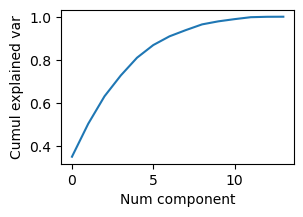

In [264]:
plt.figure(figsize=(3, 2))
plt.plot(range(0,14), pca.explained_variance_ratio_.cumsum()) #use number of atributes for the range of the plot
plt.xlabel('Num component')
plt.ylabel('Cumul explained var')

In [357]:
pca = PCA(n_components=5)
pca.fit(std)
scores_pca = pca.transform(std)

In [358]:
wcss = []
for i in range(1,22):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42) 
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

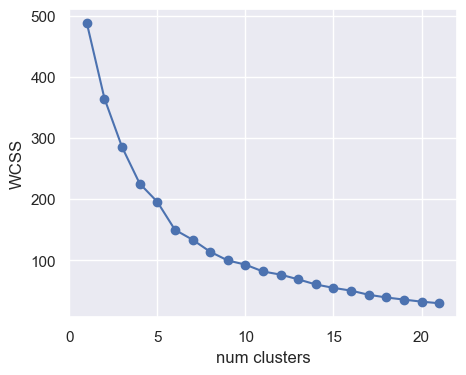

In [359]:
plt.figure(figsize = (5,4))
plt.plot(range(1, 22), wcss, marker='o')
plt.xlabel('num clusters')
plt.ylabel('WCSS')
plt.show()

In [379]:
kmeans_pca = KMeans(n_clusters=6, init='k-means++', random_state=42)

In [380]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=6, random_state=42)

In [381]:
ratios_pca = pd.concat([ratios.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
ratios_pca.columns.values[-5:] = ['Component1', 'Component2', 'Component3', 'Component4', 'Component5' ]
ratios_pca['pca_kmeans_labels'] = kmeans_pca.labels_

In [382]:
ratios_plot = ratios_pca[['hetero_nuc_R',
                         'mean_nuc_area_cyto_R',
                        'mean_nuc_aspect',
                          'mean_nuc_roundness',
                          'number_nuc_cell_area_R',
                          'mean_mito_area_cyto_R',
                          'mean_mito_aspect',
                          'mean_mito_roundness',
                          'number_mito_cell_area_R',
                          'gold_cyto_R',
                          'lyso_cyto_R',
                         'ER_cyto_R',
                         'cell_roundness',
                          'cell_aspect',
                         'pca_kmeans_labels'
                            ]]



In [383]:
ratios_plot = ratios_plot.fillna(0)

In [384]:
cmap = {0:'cyan',
       1: 'black', #purple
       2:'red', 
       3:'green',
       4:'#aaaaff',
       5: 'orange',
       6: 'pink'}

clabels = [cmap.get(k) for k in ratios_plot['pca_kmeans_labels']]

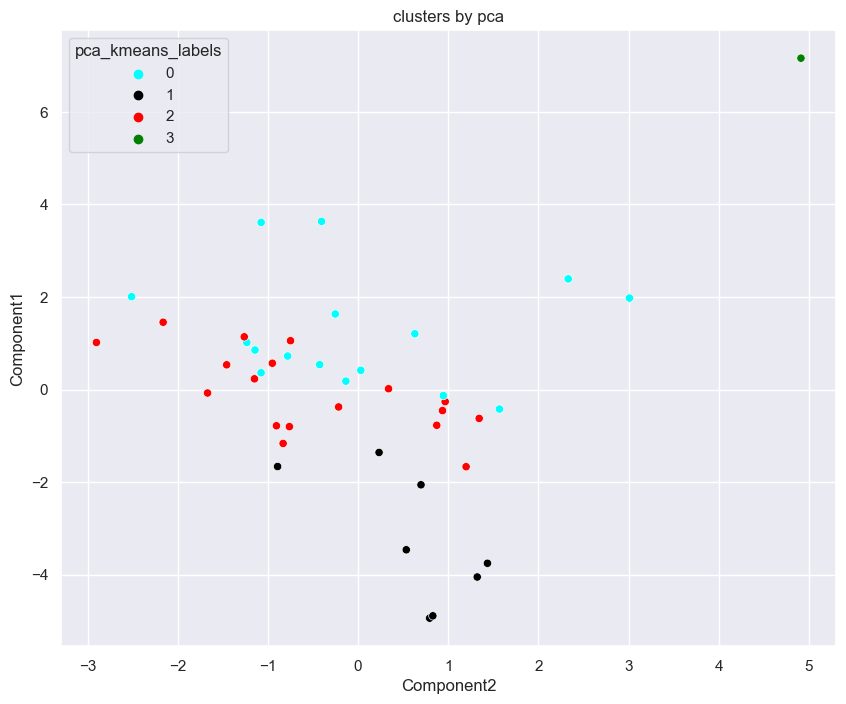

In [373]:
x_axis = ratios_pca['Component2']
y_axis = ratios_pca['Component1']
plt.figure(figsize=(10,8))
sns.scatterplot(data=ratios_pca, x='Component2', y='Component1', hue='pca_kmeans_labels', palette=cmap)

plt.title('clusters by pca')
plt.savefig('3d_5pca_4clust.png')

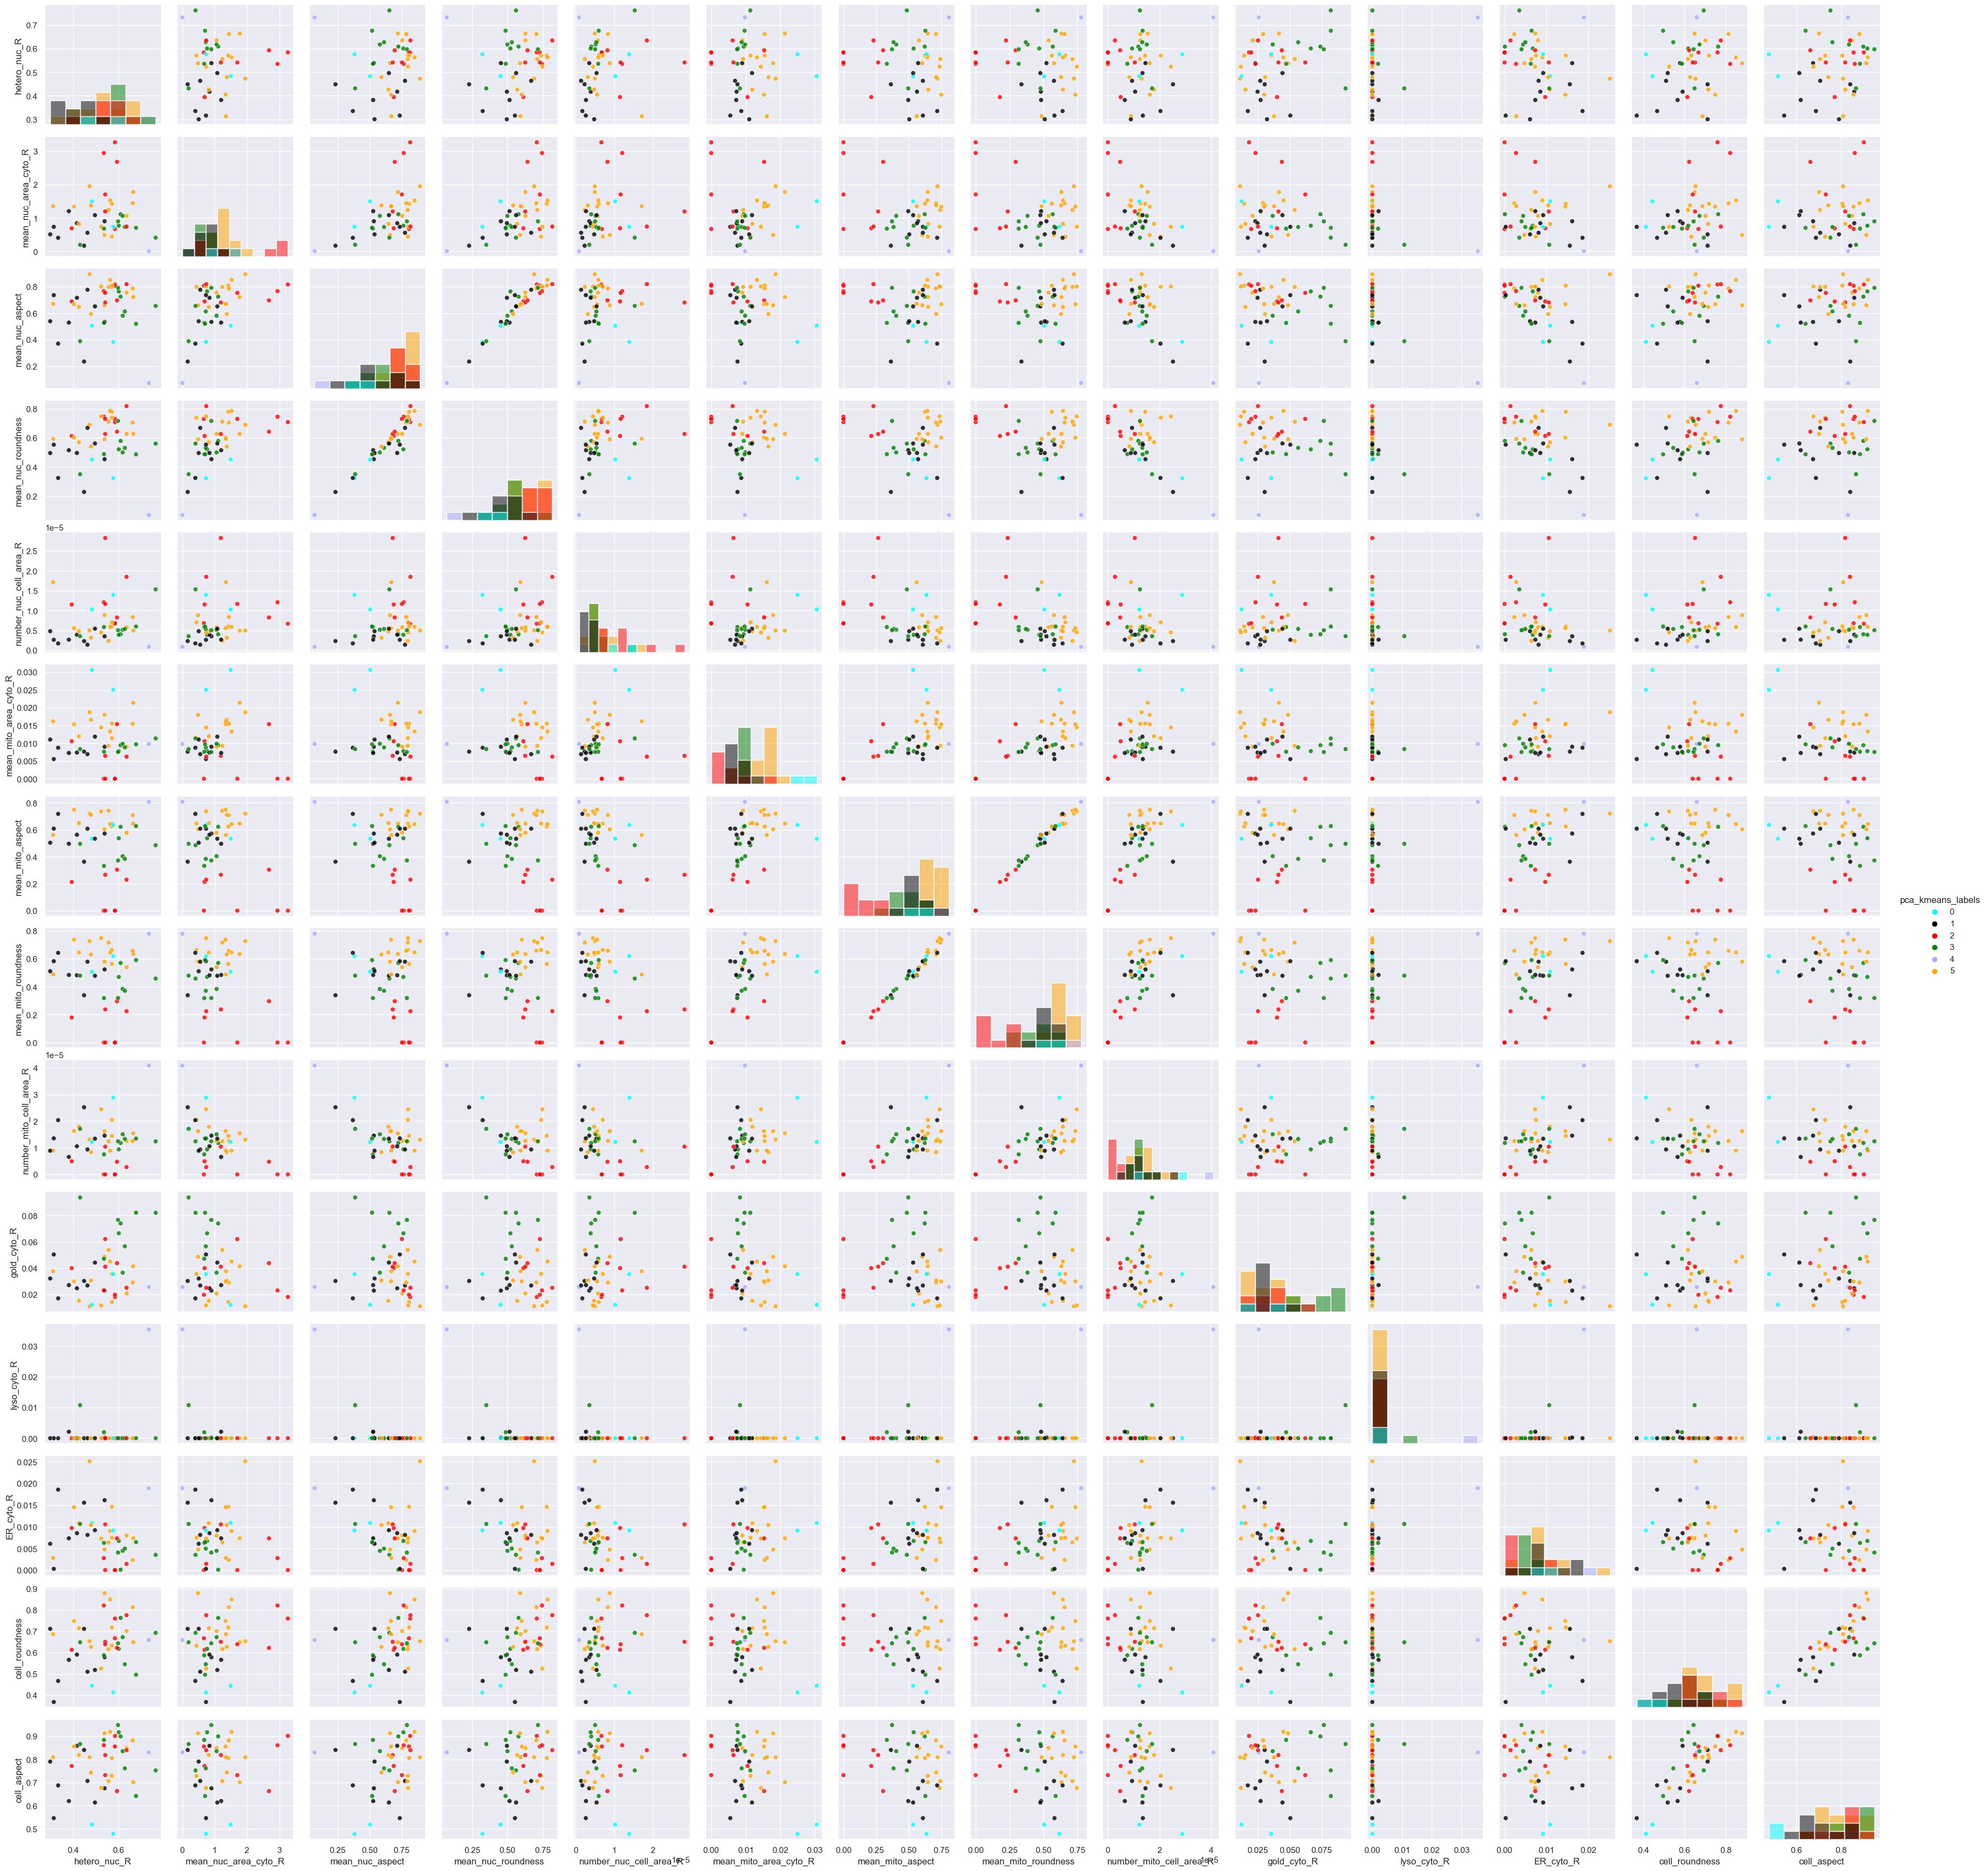

In [385]:
sns.set(rc={'figure.figsize':(100,120)})
g = sns.PairGrid(ratios_plot,
                 hue='pca_kmeans_labels',
                 palette=cmap
                )

g.map_offdiag(sns.scatterplot, alpha=0.8)
g.map_diag(sns.histplot)
g.add_legend()
plt.savefig('features3d_5pca_6clusters.png')

# Old code

In [11]:



layer2 = np.where(cell_labels[2]==1)
layer0[0].min(), layer1[0].min(), layer2[0].min() #x1, x2, y1, y2 coordinates of cell 1 in section 0


NameError: name 'cell_labels' is not defined

In [ ]:
layer0 = np.where(cell_labels[0]==1)
    
layer1 = np.where(cell_labels[1]==1)

layer0[0].min(),layer0[0].max(), layer0[1].min(),  layer0[1].max(), layer1[0].min(),layer1[0].max(), layer1[1].min(),  layer1[1].max() #x1, x2, y1, y2 coordinates of cell 1 in section 0


In [ ]:
coords = list()
coords = np.where(cell_labels ==1)
coords_2 = np.where(cell_labels ==2)
coords, coords_2

In [61]:
m = cell_labels.max()
stack_coords = []
for i in range(1, m+1): #m+1, because python doesn´t include the last value 
    coords = []
    coords = list(np.where(cell_labels ==i))
    stack_coords.append(coords)
stack_coords

[[array([0, 0, 0, ..., 4, 4, 4], dtype=int64),
  array([3256, 3256, 3256, ..., 5091, 5091, 5091], dtype=int64),
  array([29756, 29757, 29758, ..., 29475, 29476, 29477], dtype=int64)],
 [array([0, 0, 0, ..., 4, 4, 4], dtype=int64),
  array([6784, 6784, 6784, ..., 7303, 7303, 7303], dtype=int64),
  array([30894, 30895, 30896, ..., 30925, 30926, 30927], dtype=int64)],
 [array([0, 0, 0, ..., 4, 4, 4], dtype=int64),
  array([ 9622,  9622,  9622, ..., 10089, 10089, 10089], dtype=int64),
  array([29706, 29707, 29708, ..., 29423, 29424, 29425], dtype=int64)],
 [array([0, 0, 0, ..., 4, 4, 4], dtype=int64),
  array([10064, 10064, 10064, ..., 10568, 10569, 10569], dtype=int64),
  array([32152, 32153, 32154, ..., 31989, 31988, 31989], dtype=int64)],
 [array([0, 0, 0, ..., 4, 4, 4], dtype=int64),
  array([10106, 10106, 10106, ..., 10585, 10585, 10585], dtype=int64),
  array([30790, 30791, 30792, ..., 31161, 31162, 31163], dtype=int64)],
 [array([0, 0, 0, ..., 4, 4, 4], dtype=int64),
  array([10120,

In [ ]:
cell_1_0 = np.where(stack_coords[0][0]==0)

In [ ]:
cell_1_0

In [ ]:
properties_3d_all = pd.DataFrame()
for i in range(len(stack_coords)):
    properties_3d_list = []
    for j in range(stack_coords[i][0].max()):
        properties_3d = pd.DataFrame()
        properties_3d['cell_id'] = i
        properties_3d['section'] = j
        properties_3d['section_area'] = np.count_nonzero(stack_coords[i][0] == j)
        properties_3d_list.append(properties_3d) 
    properties_3d_all = pd.concat(properties_3d_list, ignore_index=True)
properties_3d_all

In [ ]:
first_coords[0].min(), first_coords[0].max(), first_coords[1].min(), first_coords[1].max(), first_coords[2].min(), first_coords[2].max()


In [ ]:
sec_coords = np.where(cell_labels == 2)

In [ ]:
sec_coords

In [ ]:
z1 = sec_coords[0].min()
z2 = sec_coords[0].max()
x1 = sec_coords[1].min() 
x2 = sec_coords[1].max()
y1 = sec_coords[2].min()
y2 = sec_coords[2].max()

In [ ]:
bbox = [[x1, y1, z1], [x2, y1, z1], [x1, y2, z1], [x2, y2, z1],[x1, y1, z2], [x2, y1, z2], [x1, y2, z2], [x2, y2, z2]]

In [ ]:
bbox_2 = [x1,x2, y1, y2, z1, z2]
bbox_2

In [ ]:
D=max(bbox_2[1]-bbox_2[0],bbox_2[3]-bbox_2[2])
d=min(bbox_2[1]-bbox_2[0],bbox_2[3]-bbox_2[2]) #x and y: 10nm and z:200nm
area = D*d
volumen = D*d*(bbox_2[5]-bbox_2[4]*20)
D, d, D/d, area, volumen

In [ ]:
area_0 = np.where(sec_coords[0] == 0)
area_0

In [ ]:
volumen, (area_0*20 + area_1*20 + area_2*20 + area_3*20 +area_4*20+ area_5*20+ area_6*20)

In [ ]:
cell_area_1 = get_area(first_coords, 1)

In [ ]:
cell_area

In [ ]:
for i in range(35168):
    for j in range(37440):
        for a in range(7):
            if cell_labels_t[i][j][a] !=0:
                print(i), print(j), print(a)
    

In [ ]:
bbox_rects = []
for region in regionprops(cell_labels):
    bbox_rect = []
    bbox = region.bbox
    bbox_rect = draw_bbox(bbox)
    bbox_rects.append(bbox_rect)

In [ ]:
 bbox_rects

In [ ]:
bbox_rects = []
for r in regionprops(cell_labels):
    bbox = region.bbox
    

In [ ]:
def get_bbox(self, labels):
    self.bboxes = [[],[]]
    for region in regionprops(labels):
        bbox=region.bbox
        self.bboxes[0].append(bbox)
        bbox_rect = Cells.draw_bbox(bbox)
        self.bboxes[1].append(bbox_rect)


In [ ]:
cell_stack_labels = cc3d.connected_components(cell_stack, connectivity=26)

In [ ]:
help(cc3d.connected_components)

In [ ]:
cell_stack_labels.shape

In [ ]:
N = np.max(cell_stack_labels)

In [ ]:
N

In [ ]:
binary_image = cell_image.astype(bool)


In [ ]:
labels = np.random.randint(0, 2, size=(7, 37440, 35168))

In [ ]:
labels